# EE0005 Group Project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math


    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [59]:
heartdata = pd.read_csv('cardio_train.csv')
heartdata.head(n = 10000)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14249,20427,1,166,65.0,130,80,1,1,0,0,0,0
9996,14251,18214,1,160,93.0,140,80,2,1,0,0,1,1
9997,14252,14665,1,158,66.0,130,90,2,2,0,0,1,0
9998,14253,18328,1,168,70.0,160,80,3,1,0,0,1,1


In [9]:
heartdata.shape

(70000, 13)

In [25]:
heartdata.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [55]:
heartdata['years'] = (heartdata['age']/365).round().astype('int')
years = pd.DataFrame(heartdata['years'])
years.head()

,years
0,50
1,55
2,52
3,48
4,48


In [56]:
height = pd.DataFrame(heartdata['height'])
height.head()

,height
0,168
1,156
2,165
3,169
4,156


In [57]:
weight = pd.DataFrame(heartdata['weight'])
weight.head()

,weight
0,62.0
1,85.0
2,64.0
3,82.0
4,56.0


In [45]:
heartdata['bmi'] = heartdata['weight'] / (heartdata['height']/100)**2
bmi = pd.DataFrame(heartdata['bmi'])
bmi.head()

,bmi
0,21.967120
1,34.927679
2,23.507805
3,28.710479
4,23.011177


In [60]:
heartdata.drop('id', axis = 1, inplace = True)

In [63]:
newdf = pd.concat([bmi, years, heartdata], axis = 1).reindex(heartdata.index)
newdf

,bmi,years,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,21.967120,50,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,34.927679,55,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,23.507805,52,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,28.710479,48,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,23.011177,48,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,26.927438,53,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,50.472681,62,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,31.353579,52,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,27.099251,61,22431,1,163,72.0,135,80,1,2,0,0,0,1


Data Visualisation

By Age

In [64]:
print("Ages: ", len(newdf["years"].unique()))

Ages:  28


In [69]:
yearsdf = pd.DataFrame(newdf['years'].value_counts())
yearsdf.head()

,years
56,6031
54,5988
58,5702
60,5465
52,5303


In [97]:
cardiodf = pd.DataFrame(newdf['cardio'])
cardiodf.head()

,cardio
0,0
1,1
2,1
3,1
4,0


<AxesSubplot:xlabel='years', ylabel='count'>

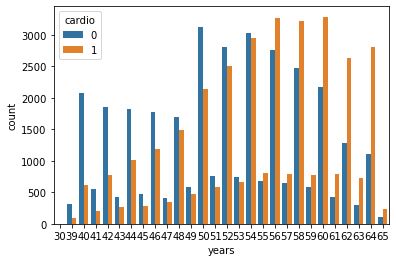

In [77]:
sb.countplot(x = 'years', hue = 'cardio', data = newdf)

In [100]:
yearDF = pd.concat([years, cardiodf], axis = 1). reindex(years.index)
yearDF

,years,cardio
0,50,0
1,55,1
2,52,1
3,48,1
4,48,0
...,...,...
69995,53,0
69996,62,1
69997,52,1
69998,61,1


In [101]:
yearDF.corr()

,years,cardio
years,1.000000,0.237749
cardio,0.237749,1.000000


By Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

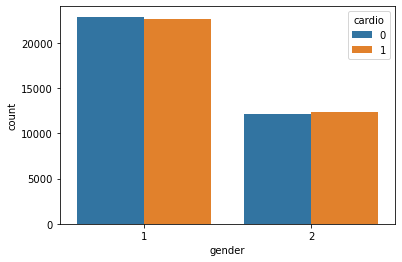

In [76]:
sb.countplot(x = 'gender', hue = 'cardio', data = newdf)

Gender: 1 is Male, 2 is Female

Count: 1 is Have disease, 2 is Do not have disease

In [105]:
genderdf = pd.DataFrame(newdf['gender'])
genderdf.head()

,gender
0,2
1,1
2,1
3,2
4,1


In [108]:
genderDF = pd.concat([genderdf, cardiodf], axis = 1). reindex(genderdf.index)
genderDF

,gender,cardio
0,2,0
1,1,1
2,1,1
3,2,1
4,1,0
...,...,...
69995,2,0
69996,1,1
69997,2,1
69998,1,1


In [109]:
genderDF.corr()

,gender,cardio
gender,1.000000,0.008109
cardio,0.008109,1.000000


For int64 data

In [82]:
intdata = pd.DataFrame(newdf[['bmi', 'years', 'height', 'weight', 
                              'ap_hi', 'ap_lo', 'cardio']])
intdata.head()

,bmi,years,height,weight,ap_hi,ap_lo,cardio
0,21.967120,50,168,62.0,110,80,0
1,34.927679,55,156,85.0,140,90,1
2,23.507805,52,165,64.0,130,70,1
3,28.710479,48,169,82.0,150,100,1
4,23.011177,48,156,56.0,100,60,0


In [83]:
intdata.corr()

,bmi,years,height,weight,ap_hi,ap_lo,cardio
bmi,1.000000,0.085422,-0.290642,0.762009,0.024852,0.035345,0.165632
years,0.085422,1.000000,-0.081456,0.053661,0.020793,0.017754,0.237749
height,-0.290642,-0.081456,1.000000,0.290968,0.005488,0.006150,-0.010821
weight,0.762009,0.053661,0.290968,1.000000,0.030702,0.043710,0.181660
ap_hi,0.024852,0.020793,0.005488,0.030702,1.000000,0.016086,0.054475
ap_lo,0.035345,0.017754,0.006150,0.043710,0.016086,1.000000,0.065719
cardio,0.165632,0.237749,-0.010821,0.181660,0.054475,0.065719,1.000000


<AxesSubplot:>

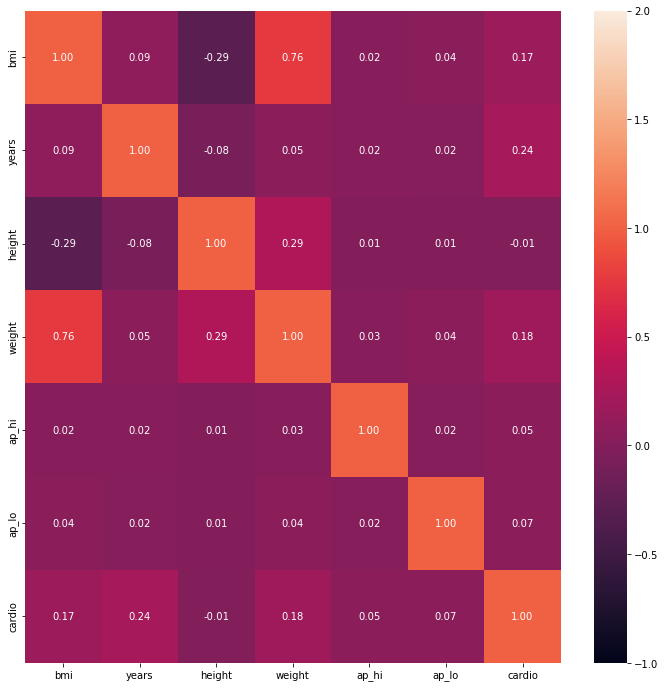

In [84]:
f = plt.figure(figsize = (12, 12))
sb.heatmap(intdata.corr(), vmin = -1, vmax = 2, annot = True, fmt = '.2f')

For categorical data

In [113]:
catdata = pd.DataFrame(newdf[['gender', 'cholesterol','gluc', 
                              'smoke', 'alco', 'active', 'cardio']])
catdata.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,2,1,1,0,0,1,0
1,1,3,1,0,0,1,1
2,1,3,1,0,0,0,1
3,2,1,1,0,0,1,1
4,1,1,1,0,0,0,0


In [114]:
catdata.corr()

,gender,cholesterol,gluc,smoke,alco,active,cardio
gender,1.000000,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
cholesterol,-0.035821,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,-0.020491,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,0.338135,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,0.170966,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330
active,0.005866,0.009911,-0.006770,0.025858,0.025476,1.000000,-0.035653
cardio,0.008109,0.221147,0.089307,-0.015486,-0.007330,-0.035653,1.000000


<AxesSubplot:>

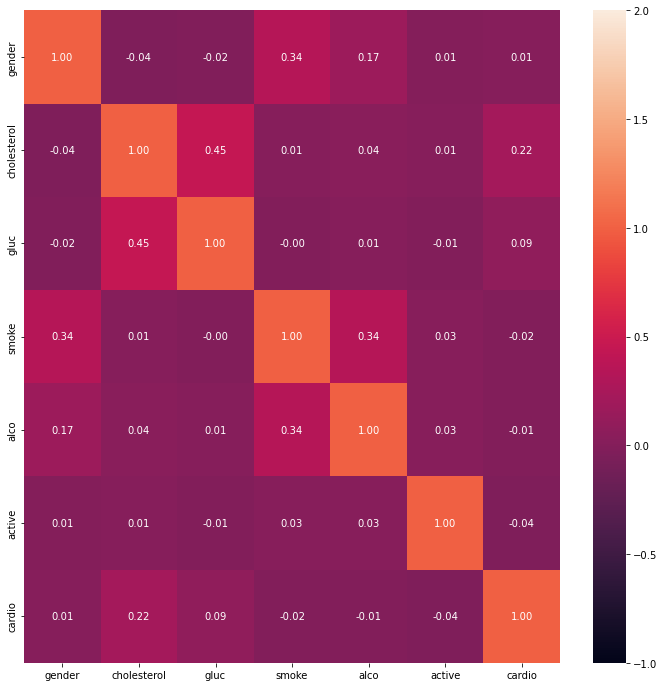

In [115]:
f = plt.figure(figsize = (12, 12))
sb.heatmap(catdata.corr(), vmin = -1, vmax = 2, annot = True, fmt = '.2f')